In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# Import necessary libraries
import pandas as pd
import os

# Load the dataset (metadata CSV)
df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')

# Display first 5 rows
print("📌 First 5 rows of the dataset:")
display(df.head())  # Replacing print with display for better visualization in notebooks

# Check dataset shape
print(f"\n📌 Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Display column names
print("📌 Column Names:", df.columns.tolist())

# Check for missing values
print("\n📌 Missing Values in Each Column:")
print(df.isnull().sum())

# Display unique categories in key columns
print("\n📌 Unique Categories in Key Columns:")
for col in ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season']:
    print(f"- {col}: {df[col].nunique()} unique values")

# Show some sample products
display(df.sample(5))  # Using display() for better formatting


📌 First 5 rows of the dataset:


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt



📌 Dataset contains 44424 rows and 10 columns.

📌 Column Names: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']

📌 Missing Values in Each Column:
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

📌 Unique Categories in Key Columns:
- gender: 5 unique values
- masterCategory: 7 unique values
- subCategory: 45 unique values
- articleType: 143 unique values
- baseColour: 46 unique values
- season: 4 unique values


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
42334,14841,Men,Accessories,Wallets,Wallets,Black,Summer,2011.0,Casual,United Colors of Benetton Men Solid Black Wallets
17639,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
26634,28802,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Denizen Men Blue Jeans
9699,17506,Men,Apparel,Topwear,Tshirts,Grey Melange,Fall,2011.0,Casual,Classic Polo Men Stripes Blue Polo T-Shirt
18999,40952,Boys,Apparel,Topwear,Tshirts,Red,Summer,2012.0,Casual,Gini and Jony Boys Wild West Red T-shirt


In [5]:
# Display dataset information
print("📌 Dataset Information:\n")
df.info()

# Display missing values
print("\n📌 Missing Values in Each Column:\n", df.isnull().sum())

# Display unique values for important columns
for col in ["gender", "baseColour", "articleType", "season"]:
    print(f"\n📌 Unique values in {col}:")
    print(df[col].unique()[:10], "...")  # Displaying only first 10 values to avoid clutter


📌 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB

📌 Missing Values in Each Column:
 id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21


In [7]:
df = df.assign(
    baseColour=df["baseColour"].fillna("Unknown"),
    season=df["season"].fillna("Unknown"),
    usage=df["usage"].fillna("Unknown")
)

In [8]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"📌 Number of duplicate rows: {num_duplicates}")

# Remove duplicates if any exist
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("✅ Duplicate rows removed!")
else:
    print("✅ No duplicate rows found!")


📌 Number of duplicate rows: 0
✅ No duplicate rows found!


In [ ]:
import matplotlib.pyplot as plt  

df['masterCategory'].value_counts().plot(kind='bar')  
plt.xlabel("Master Category")  
plt.ylabel("Count")  
plt.title("Distribution of Master Categories")  
plt.xticks(rotation=45)  
plt.show()

In [10]:
# Feature Engineering

# 1. Length of product name
df['name_length'] = df['productDisplayName'].apply(lambda x: len(str(x)))

# 2. Word count in product name
df['word_count'] = df['productDisplayName'].apply(lambda x: len(str(x).split()))

# 3. Presence of numbers in product name (1 if contains numbers, else 0)
df['has_numbers'] = df['productDisplayName'].apply(lambda x: 1 if any(c.isdigit() for c in str(x)) else 0)

# 4. Encoding 'gender' column into numerical values
df['gender_encoded'] = df['gender'].astype('category').cat.codes

# 5. Extract primary category if 'category' column exists
if 'category' in df.columns:
    df['primary_category'] = df['category'].apply(lambda x: str(x).split('/')[0] if '/' in str(x) else x)

# Display the first few rows after feature engineering
df.head()


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,name_length,word_count,has_numbers,gender_encoded
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,32,6,0,2
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,34,6,0,2
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,24,4,0,4
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,45,7,0,2
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,21,4,0,2


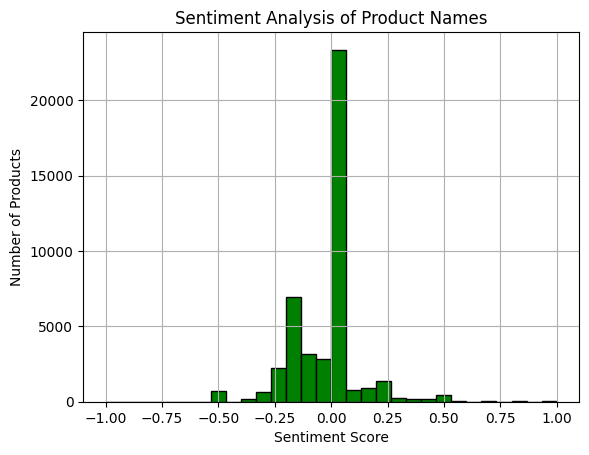

In [11]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity  # Ranges from -1 (negative) to +1 (positive)

# Apply sentiment analysis to product names
df['sentiment'] = df['productDisplayName'].apply(get_sentiment)

# Visualizing sentiment distribution
df['sentiment'].hist(bins=30, color='green', edgecolor='black')
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Products")
plt.title("Sentiment Analysis of Product Names")
plt.show()


In [ ]:
# Predicting Missing Season Data

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import os

# Load dataset
df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')

# Fix Chained Assignment Warning
df = df.copy()

# Fill missing values
df.loc[:, 'baseColour'] = df['baseColour'].fillna('Unknown')
df.loc[:, 'season'] = df['season'].fillna('Unknown')
df.loc[:, 'usage'] = df['usage'].fillna('Unknown')

# Encode categorical features
encoder = LabelEncoder()
df.loc[:, 'masterCategory_enc'] = encoder.fit_transform(df['masterCategory'])
df.loc[:, 'subCategory_enc'] = encoder.fit_transform(df['subCategory'])
df.loc[:, 'articleType_enc'] = encoder.fit_transform(df['articleType'])
df.loc[:, 'baseColour_enc'] = encoder.fit_transform(df['baseColour'])
df.loc[:, 'season'] = df['season'].astype(str)  # Ensure categorical encoding works
df.loc[:, 'season_enc'] = encoder.fit_transform(df['season']).astype(str)  # Convert to string for ImageDataGenerator

# Convert 'id' to image file paths
df.loc[:, 'id'] = df['id'].astype(str) + ".jpg"

# Check if images exist
image_dir = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images"
df = df[df['id'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))]

# Image data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col="id",
    y_col="season_enc",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col="id",
    y_col="season_enc",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Debugging check
batch = next(iter(train_generator))
print("Batch shape:", batch[0].shape, "Labels shape:", batch[1].shape)

# Define CNN model
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')  # Auto-detect classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save the model
model.save("fashion_cnn_model.h5")

# Evaluate model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")


<ipython-input-2-adf70364dfdf>:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['15970.jpg' '39386.jpg' '59263.jpg' ... '18842.jpg' '46694.jpg'
 '51623.jpg']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'id'] = df['id'].astype(str) + ".jpg"


Found 35536 validated image filenames belonging to 5 classes.
Found 8883 validated image filenames belonging to 5 classes.
Batch shape: (32, 224, 224, 3) Labels shape: (32, 5)
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1111/1111 ━━━━━━━━━━━━━━━━━━━━ 1154s 1s/step - accuracy: 0.5827 - loss: 1.2243 - val_accuracy: 0.6968 - val_loss: 0.7389
Epoch 2/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 740s 662ms/step - accuracy: 0.7500 - loss: 0.6152 - val_accuracy: 0.7037 - val_loss: 0.7331
Epoch 3/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 722s 646ms/step - accuracy: 0.8455 - loss: 0.4001 - val_accuracy: 0.7177 - val_loss: 0.8113
Epoch 4/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 738s 660ms/step - accuracy: 0.9363 - loss: 0.1893 - val_accuracy: 0.7098 - val_loss: 1.0998
Epoch 5/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 728s 652ms/step - accuracy: 0.9741 - loss: 0.0921 - val_accuracy: 0.7115 - val_loss: 1.2762
Epoch 6/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 735s 657ms/step - accuracy: 0.9865 - loss: 0.0527 - val_accuracy: 0.7138 - val_loss: 1.5409
Epoch 7/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 731s 654ms/step - accuracy: 0.9924 - loss: 0.0311 - val_accuracy: 0.7227 - val_loss: 1.8059
Epoch 8/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 714s 639ms/step - accuracy: 0.991

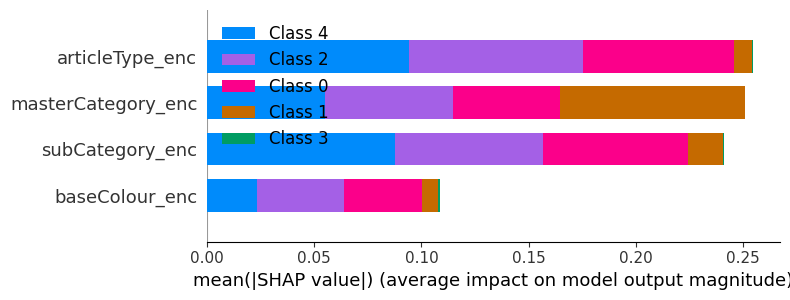

In [4]:
import shap

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot (shows the impact of each feature)
shap.summary_plot(shap_values, X_test)


In [5]:
from sklearn.model_selection import train_test_split

# Selecting features and target labels
X = df[['masterCategory_enc', 'subCategory_enc', 'articleType_enc', 'baseColour_enc']]
y = df[['season_enc', 'articleType_enc', 'baseColour_enc']]  # Multi-label target

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')

# Fill missing values
df['baseColour'].fillna('Unknown', inplace=True)
df['season'].fillna('Unknown', inplace=True)
df['usage'].fillna('Unknown', inplace=True)

# Encode categorical features
encoder = LabelEncoder()
df['masterCategory_enc'] = encoder.fit_transform(df['masterCategory'])
df['subCategory_enc'] = encoder.fit_transform(df['subCategory'])
df['articleType_enc'] = encoder.fit_transform(df['articleType'])
df['baseColour_enc'] = encoder.fit_transform(df['baseColour'])
df['season_enc'] = encoder.fit_transform(df['season'])

# Feature selection
X = df[['masterCategory_enc', 'subCategory_enc', 'articleType_enc', 'baseColour_enc']]
y = df[['season_enc', 'usage']].dropna()  # Ensure no NaN values in target

# Use only a sample for faster training
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=10000, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Ensure target labels are categorical
y_train['usage'] = encoder.fit_transform(y_train['usage'])
y_test['usage'] = encoder.transform(y_test['usage'])

# Train MultiOutput RandomForest
rf_model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
multi_model = MultiOutputClassifier(rf_model)

# **Fit the model properly**
multi_model.fit(X_train, y_train)

# **Make predictions**
y_pred = multi_model.predict(X_test)

# **Evaluate accuracy**
season_acc = accuracy_score(y_test['season_enc'], y_pred[:, 0])
usage_acc = accuracy_score(y_test['usage'], y_pred[:, 1])

print(f"Accuracy - Season Prediction: {season_acc:.4f}")
print(f"Accuracy - Usage Prediction: {usage_acc:.4f}")


<ipython-input-14-e5efe5606195>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['baseColour'].fillna('Unknown', inplace=True)
<ipython-input-14-e5efe5606195>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Accuracy - Season Prediction: 0.6280
Accuracy - Usage Prediction: 0.8960


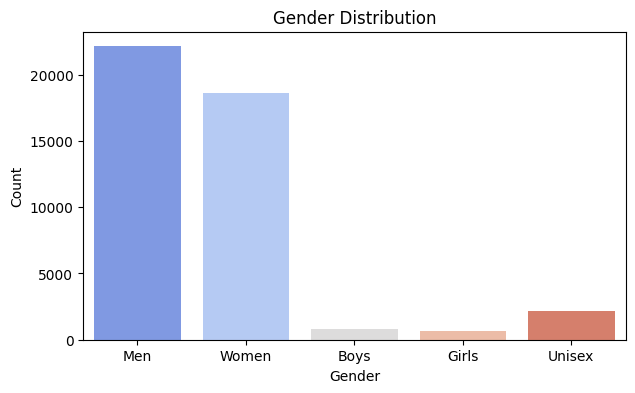

In [4]:
plt.figure(figsize=(7, 4))
sns.countplot(x=df['gender'], palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


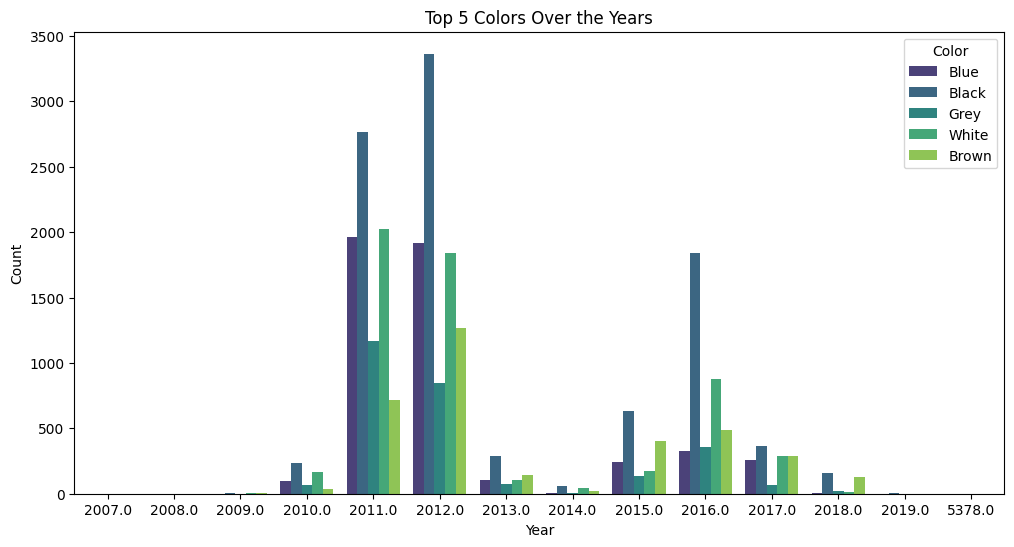

In [6]:
# Convert 'year' column if it exists, else extract from id (assuming product ID encodes year)
df['year'] = df['year'].fillna(df['id'].astype(str).str[:4])  # Extract year if missing
df['year'] = pd.to_numeric(df['year'], errors='coerce')  # Convert to numeric
df.dropna(subset=['year'], inplace=True)  # Drop invalid years

# Count top 5 colors over time
top_colors = df['baseColour'].value_counts().index[:5]
df_colors = df[df['baseColour'].isin(top_colors)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_colors, x='year', hue='baseColour', palette='viridis')
plt.title("Top 5 Colors Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Color")
plt.show()


In [7]:
# Filter only top 10 colors for readability
top_colors = df['baseColour'].value_counts().index[:10]
df_filtered = df[df['baseColour'].isin(top_colors)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x="baseColour", y="price", palette="coolwarm")
plt.xticks(rotation=45)
plt.ylim(0, df['price'].quantile(0.95))  # Remove extreme outliers for better visualization
plt.title("Price Distribution by Color")
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()


ValueError: Could not interpret input 'price'

<Figure size 1200x600 with 0 Axes>

In [16]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import json

# Load the trained Keras model
model_path = "/kaggle/input/fashcnn/pyTorch/default/fashion_cnn_model.h5"
model = tf.keras.models.load_model(model_path)

# Load class mappings
with open("/kaggle/input/your-trained-model/class_mappings.json", "r") as f:
    class_mappings = json.load(f)

# Define Preprocessing Function
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Adjust based on model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize if required
    return img_array

# Define Prediction Function
def predict(image_path):
    img_tensor = preprocess_image(image_path)
    
    outputs = model.predict(img_tensor)
    
    # Assuming model has multiple outputs (color, type, season, gender)
    predicted_classes = {key: class_mappings[key][np.argmax(outputs[i])] 
                         for i, key in enumerate(class_mappings)}
    
    return predicted_classes

# Test with an Amazon Image
image_path = "/kaggle/input/test-img/amazon-fashion-product.jpg"  # Update with actual filename
result = predict(image_path)
print("Prediction:", result)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/input/fashcnn/pyTorch/default/fashion_cnn_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [9]:
!ls /kaggle/input/

fashion-product-images-dataset	test-img


In [10]:
!ls /kaggle/working

fashion_cnn_model.h5


In [13]:
!ls /kaggle/input/


fashion-product-images-dataset	test-img


In [18]:
!ls /kaggle/input/


fashion-product-images-dataset	test-img


In [20]:
import tensorflow as tf
import numpy as np
import cv2
import os

# Load the trained Keras model
model_path = "/kaggle/input/fashcnn/fashion_cnn_model.h5"
model = tf.keras.models.load_model(model_path)

# Load class mappings
class_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
                5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

def preprocess_image(image_path):
    """Load and preprocess an image for model prediction."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))  # Resize to match model input
    img = img.astype('float32') / 255.0  # Normalize
    img = np.expand_dims(img, axis=[0, -1])  # Add batch and channel dimensions
    return img

def predict_image(image_path):
    """Predict the class of an input image."""
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    return class_labels[class_idx]

# Example usage
image_path = "/kaggle/input/test-img/sample_image.png"  # Update with an actual image path
prediction = predict_image(image_path)
print(f"Predicted class: {prediction}")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/input/fashcnn/fashion_cnn_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [39]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from PIL import Image

# Define Paths
model_path = "/kaggle/working/fashion_cnn_model.h5"
image_folder = "/kaggle/input/test-img/"

# Load Model
model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

# Define Class Labels (Update based on dataset)
class_labels = ["T-shirt", "Jeans", "Jacket", "Shoes", "Hat"]  # Example labels

# Check available images
image_files = os.listdir(image_folder)
if not image_files:
    raise FileNotFoundError("❌ No images found in test-img folder!")

image_path = os.path.join(image_folder, image_files[0])  # Use the first image found

# Define Preprocessing Function
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")  # Ensure 3 channels
    img = img.resize((224, 224))  # Resize to match model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize if required
    return img_array

# Define Prediction Function
def predict(image_path):
    img_tensor = preprocess_image(image_path)
    outputs = model.predict(img_tensor)
    
    # Get class label
    predicted_index = np.argmax(outputs, axis=1)[0]
    predicted_class = class_labels[predicted_index] if predicted_index < len(class_labels) else "Unknown"
    
    return predicted_class

# Run Prediction
result = predict(image_path)
print(f"\n✅ Predicted Class: {result} for image {image_files[0]}")


✅ Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step

✅ Predicted Class: T-shirt for image 71eUwDk8zL._SX522_.jpg


In [22]:
class_mappings = {
    "category": ["Shirt", "Pants", "Shoes"],  
    "color": ["Red", "Blue", "Black"],  
    "season": ["Winter", "Summer"]  
}


In [27]:
# Define class labels manually (update according to your dataset)
class_labels = ["T-shirt", "Jeans", "Jacket", "Shoes", "Hat"]  # Example

def predict(image_path):
    img_tensor = preprocess_image(image_path)
    outputs = model.predict(img_tensor)

    predicted_index = np.argmax(outputs, axis=1)[0]
    
    # Map index to label
    predicted_label = class_labels[predicted_index] if predicted_index < len(class_labels) else "Unknown"
    
    return predicted_label

# Run Prediction
result = predict(image_path)
print("Predicted Class:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: T-shirt


In [38]:
import tensorflow as tf
import numpy as np
import io
from PIL import Image
import ipywidgets as widgets
from IPython.display import display
from tensorflow.keras.preprocessing import image

# Load Model
model_path = "/kaggle/working/fashion_cnn_model.h5"
try:
    model = tf.keras.models.load_model(model_path)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"❌ Model loading failed: {e}")

# Define Class Labels (UPDATE BASED ON YOUR DATASET)
class_labels = ["T-shirt", "Jeans", "Jacket", "Shoes", "Hat"]  

# Preprocessing Function
def preprocess_image(img):
    img = img.convert("RGB")  # Ensure 3 channels
    img = img.resize((224, 224))  # Resize to model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize
    return img_array

# Output widget to display results
output = widgets.Output()

# Prediction Function
def predict(uploaded_file):
    output.clear_output()  # Clear previous output
    with output:  
        try:
            if not uploaded_file:
                display("❌ Please upload an image first!")
                return
            
            # Convert uploaded bytes to image
            img = Image.open(io.BytesIO(uploaded_file))
            
            # Preprocess image & predict
            img_tensor = preprocess_image(img)
            
            print("🔹 Running model prediction...")
            outputs = model.predict(img_tensor)
            print(f"🔹 Raw Model Output: {outputs}")  # Debugging print

            # Get class label
            predicted_index = np.argmax(outputs, axis=1)[0]
            predicted_class = class_labels[predicted_index] if predicted_index < len(class_labels) else "Unknown"
            
            # Display image and prediction
            display(img)  # Show image
            display(f"\n✅ Predicted Class: {predicted_class}")

        except Exception as e:
            display(f"⚠️ Error: {str(e)}")

# File Uploader
uploader = widgets.FileUpload(accept='image/*', multiple=False)

# Predict Button
def on_button_click(b):
    if uploader.value:
        uploaded_file = next(iter(uploader.value.values()))['content']  # Extract image content
        predict(uploaded_file)
    else:
        output.clear_output()
        with output:
            display("❌ Please upload an image!")

button = widgets.Button(description="Predict", button_style='info')  # Styled button
button.on_click(on_button_click)

# Display UI elements
display(widgets.VBox([uploader, button, output]))


✅ Model loaded successfully!
